In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
%matplotlib inline

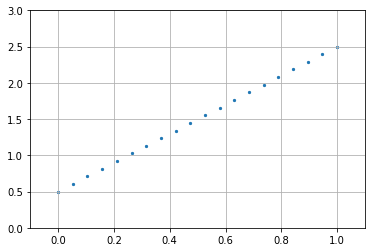

In [2]:
x = np.linspace(0, 1, 20)
m = 2
c = 0.5
y = m * x + c
plt.scatter(x, y, s=5)
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

In [3]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

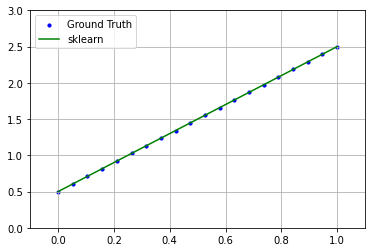

In [4]:
yhat = lr.predict(x.reshape(-1, 1))
plt.scatter(x, y, s=10, c='b', label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 3])
plt.legend()
plt.grid()

In [5]:
lr.coef_

array([2.])

In [6]:
lr.intercept_

0.5000000000000002

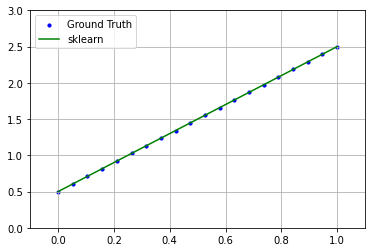

In [7]:
yhat = np.dot(x.reshape(-1, 1), lr.coef_) + lr.intercept_

plt.scatter(x, y, s=10, c='b', label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 3])
plt.legend()
plt.grid()

## **Exercise**: Pick a random slope and intercept; and draw a line. Find the correct slope and intercept with sklearn.

In [8]:
# enter code here
m = 13
c = 1.34
x = np.linspace(0,1,100)
y = m * x + c
lr = LinearRegression()
lr.fit (x.reshape(-1,1), y)
lr.coef_, lr.intercept_

(array([13.]), 1.3400000000000025)

# Multiple Regression with sklearn

In [9]:
boston = data.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['value'] = boston.target
df.head()

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
y = boston.target
X = boston.data
lr.fit(X, y)

LinearRegression()

In [11]:
yhat = lr.predict(X)

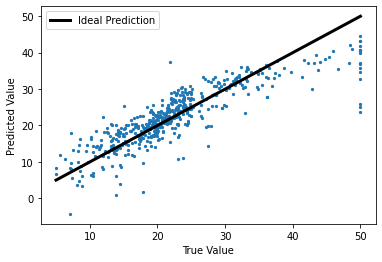

In [12]:
plt.scatter(y, yhat, s=5)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k', linewidth=3, label='Ideal Prediction')
plt.legend()

## Measuring Error

In [13]:
mean_squared_error(y, yhat)

21.894831181729202

In [14]:
r2_score(y, yhat)

0.7406426641094095

## Importance of individual features

<AxesSubplot:>

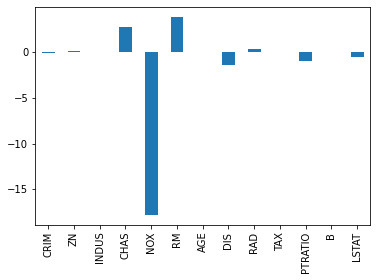

In [15]:
f_imp = pd.Series(lr.coef_, index=boston.feature_names)
f_imp.plot(kind='bar')

## Exercise: How do we interpret this?

In [16]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

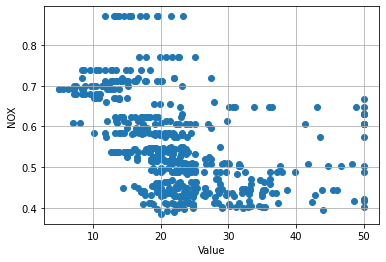

In [17]:
plt.scatter(y, df['NOX'].values)
plt.xlabel('Value')
plt.ylabel('NOX')
plt.grid()

In [18]:
nox = df['NOX'].values
y = df['value'].values
lr.fit(nox.reshape(-1, 1), y)
yhat = lr.predict(nox.reshape(-1, 1))

r2_score(y, yhat)

0.182603042501699

In [19]:
lr.coef_

array([-33.91605501])

## Cumumlative feature variances

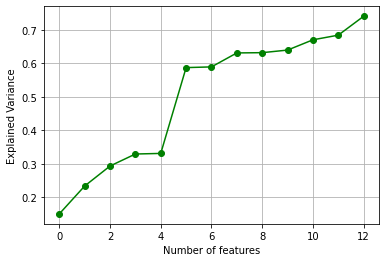

In [20]:
y = boston.target
X = boston.data
variances = []
for i in range(X.shape[1]):
    xx = X[:, :(i + 1)]
    lr.fit(xx, y)
    variances.append(explained_variance_score(y, lr.predict(X[:, :(i + 1)])))

plt.plot(variances, 'go-')
plt.xlabel('Number of features')
plt.ylabel('Explained Variance')
plt.grid()

### Linear Regression
Extend the following code snippet, and Identify the r2 score by using NOX and CHAS variables as your predictor variables and value as outcome variable?

In [21]:
from sklearn import datasets as data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
boston = data.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['value'] = boston.target

collist = ['NOX', 'CHAS']
X = df[collist].values
y = df['value'].values
lr  = LinearRegression()
lr.fit(X, y)
yhat = lr.predict(X)
r2_score(y, yhat)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

0.22888379517392654

## **Exercise**
### Use the Diabetes dataset (provided below) to fit a linear regression model.
### Rank the features in order of _decreasing_ importance.

In [22]:
diabetest = data.load_diabetes()

In [23]:
# enter code here
diabetest.feature_names
df = pd.DataFrame(diabetest.data, columns=diabetest.feature_names)
df['value'] = diabetest.target

In [24]:
X = diabetest.data
y = diabetest.target

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [25]:
lr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

<AxesSubplot:>

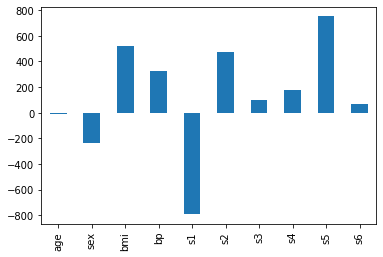

In [26]:
features = pd.Series(lr.coef_, diabetest.feature_names)
features.plot(kind='bar')

<AxesSubplot:>

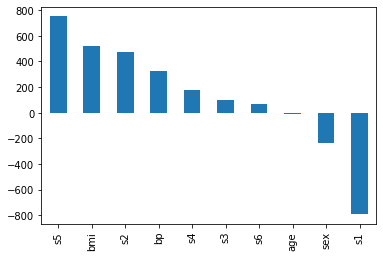

In [27]:
features.sort_values(ascending=False, inplace=True)
features.plot(kind='bar')